<a href="https://colab.research.google.com/github/Utkarsha1407/Machine-Learning-Projects/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment on Clustering Techniques
Download the following customer dataset from below link:
Data Set: https://www.kaggle.com/shwetabh123/mall-customers
This dataset gives the data of Income and money spent by the customers visiting a Shopping Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as a mall owner you need to find the group of people who are the profitable customers for the mall owner.
Apply K-Means clustering algorithms (based on Spending Score) to find the group of customers.
a.   	Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.
b.  	Perform data-preparation (Train-Test Split)
c.   	Apply Machine Learning Algorithm
d.  	Evaluate Model.
e.   	Apply Cross-Validation and Evaluate Model


In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
 df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [ ]:
 df.drop(columns=['CustomerID'], inplace = True)

In [ ]:
 df.nunique()

,0
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


<Axes: >

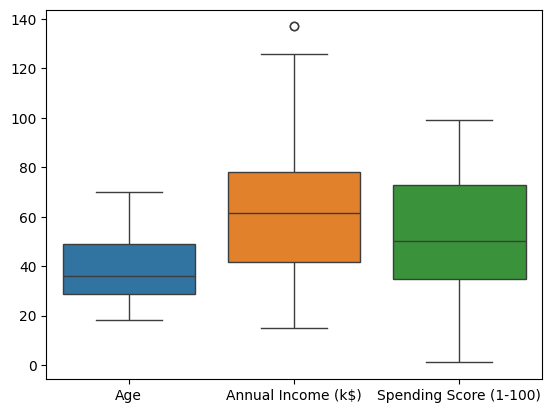

In [ ]:
 sns.boxplot(data = df)

/tmp/ipython-input-3959477262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

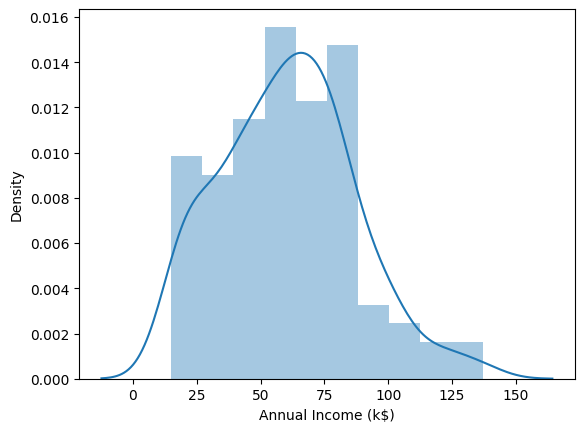

In [ ]:
 sns.distplot(df['Annual Income (k$)'])

/tmp/ipython-input-2971057642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

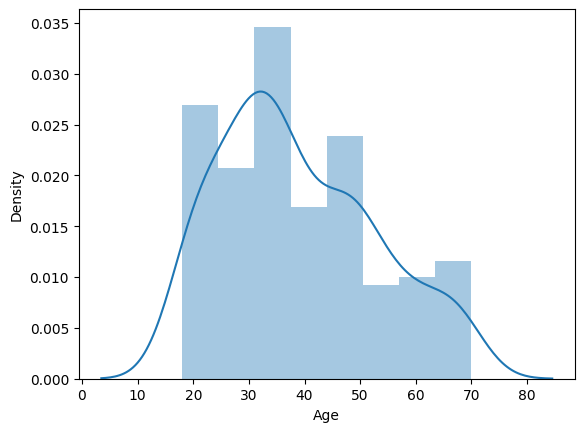

In [ ]:
 sns.distplot(df['Age'])

/tmp/ipython-input-3573992281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

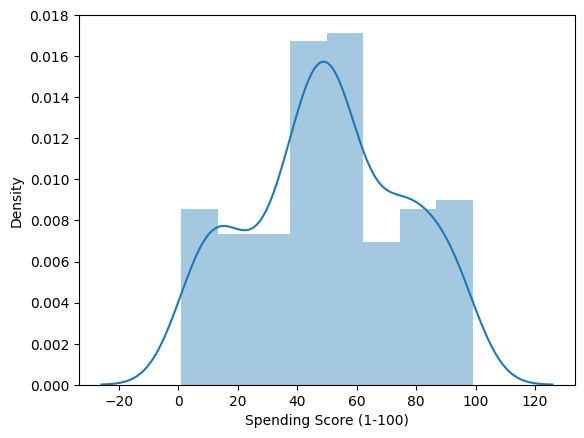

In [ ]:
 sns.distplot(df['Spending Score (1-100)'])

<Axes: xlabel='Gender', ylabel='count'>

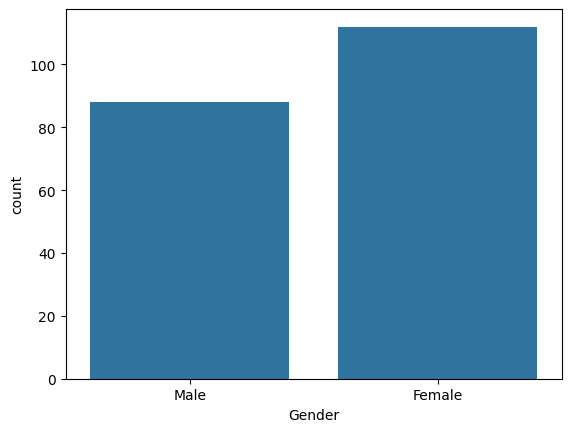

In [ ]:
 sns.countplot(x = 'Gender', data = df)

In [ ]:
 df['Gender'].value_counts(normalize=True) * 100

,proportion
Gender,
Female,56.0
Male,44.0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

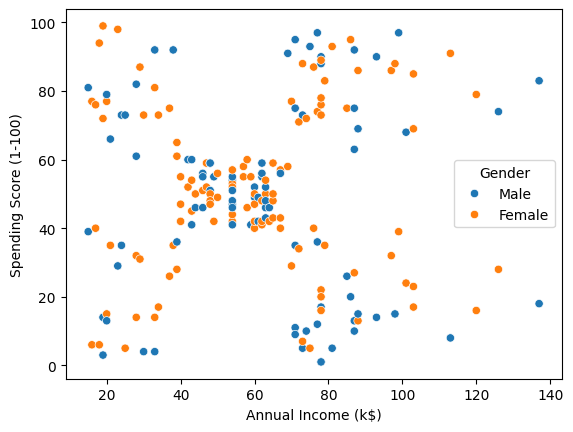

In [ ]:
 sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

In [ ]:
 from sklearn.preprocessing import StandardScaler

In [ ]:
 scaler = StandardScaler()



In [ ]:
 df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
 df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913


In [ ]:
 df.select_dtypes(include='number').corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [ ]:
 from sklearn.preprocessing import LabelEncoder

In [ ]:
 le = LabelEncoder()

In [ ]:
 df["Gender"] = le.fit_transform(df["Gender"])

In [ ]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913


In [ ]:
 import warnings
 warnings.filterwarnings('ignore')

In [ ]:
 from sklearn.cluster import KMeans
 wcss_list = []
 for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)

In [ ]:
 wcss_list

[438.5224115567774,
 345.20503469910585,
 254.36171423484498,
 216.78490151651047,
 181.95143624341463,
 171.37266048943803,
 153.29724063982408,
 142.71846488584754,
 133.3266400544609]

Text(0.5, 1.0, 'Elbow Method For Optimal k')

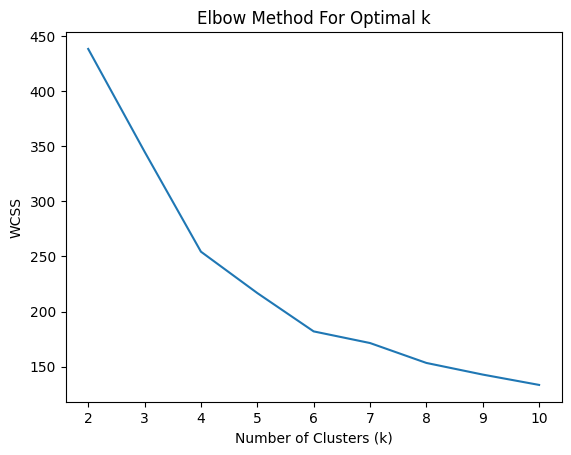

In [ ]:
 sns.lineplot(x=range(2,11), y=wcss_list)
 plt.xlabel('Number of Clusters (k)')
 plt.ylabel('WCSS')
 plt.title('Elbow Method For Optimal k')

In [ ]:
 from sklearn.cluster import KMeans
 from sklearn.metrics import silhouette_score
 silhouette_scores = []
 for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    labels = kmeans.predict(df)
    # Calculate Silhouette Scor
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

Text(0.5, 1.0, 'Silhouette Scores for Different k Values')

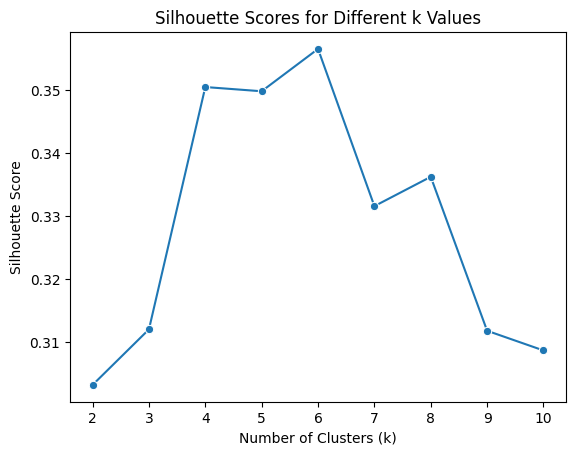

In [ ]:
sns.lineplot(x=range(2,11), y=silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')

In [ ]:
 #from sklearn.cluster import KMeans (already imported)
 num_clusters = 5
 kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
 df['cluster'] = kmeans.fit_predict(df)

In [ ]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,-1.424569,-1.738999,-0.434801,2
1,1,-1.281035,-1.738999,1.195704,4
2,0,-1.352802,-1.700830,-1.715913,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

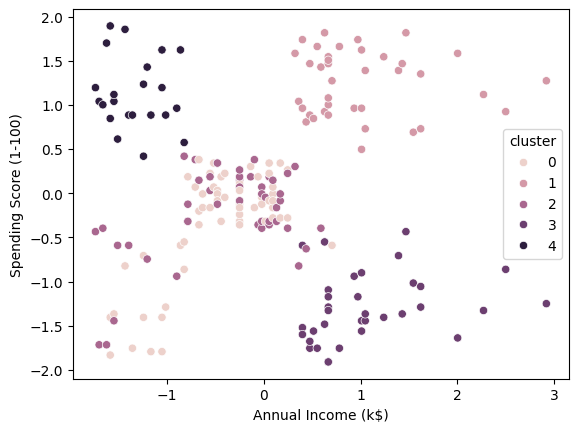

In [ ]:
 sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = "cluster", data = df)

Hierachial clustering

In [ ]:
 from sklearn.cluster import AgglomerativeClustering
 from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
 # Compute the Linkage matrix
 matrix = linkage(df, method = 'ward')

Text(0, 0.5, 'Distance')

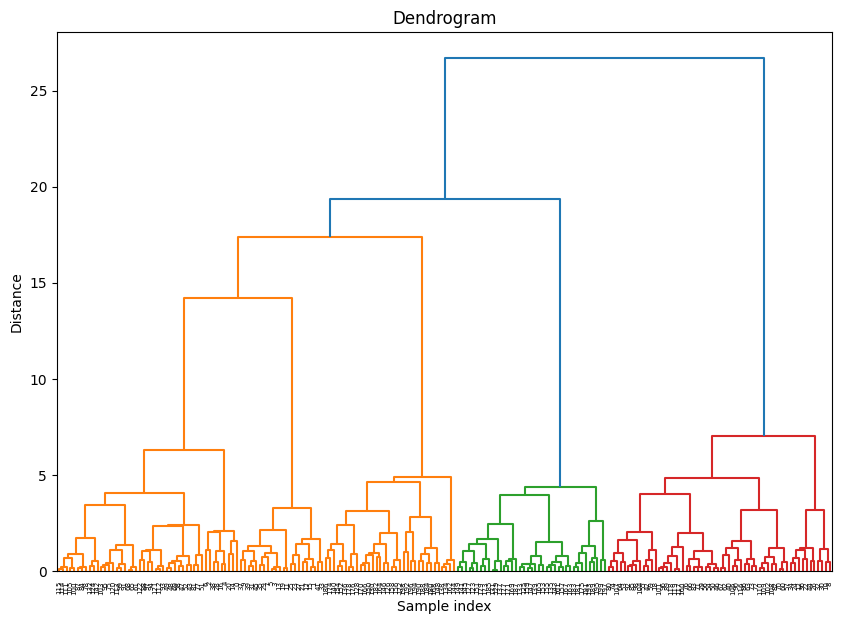

In [ ]:
 # Plot the dendrogram
 plt.figure(figsize = (10, 7))
 dendrogram(matrix, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
 plt.title('Dendrogram')
 plt.xlabel('Sample index')
 plt.ylabel('Distance')

In [ ]:
 # Set the number of clusters
 num_clusters = 4


In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters = num_clusters, linkage = 'ward')
clusters = agg_clustering.fit_predict(df)

In [ ]:
 df['Cluster1'] = clusters

In [ ]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Cluster1
0,1,-1.424569,-1.738999,-0.434801,2,0
1,1,-1.281035,-1.738999,1.195704,4,0
2,0,-1.352802,-1.700830,-1.715913,2,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

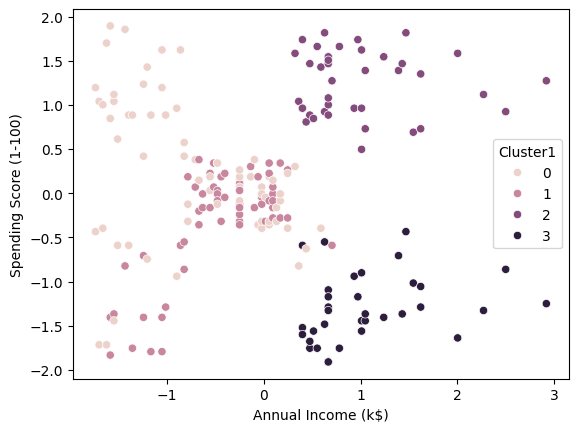

In [ ]:
 sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster1')